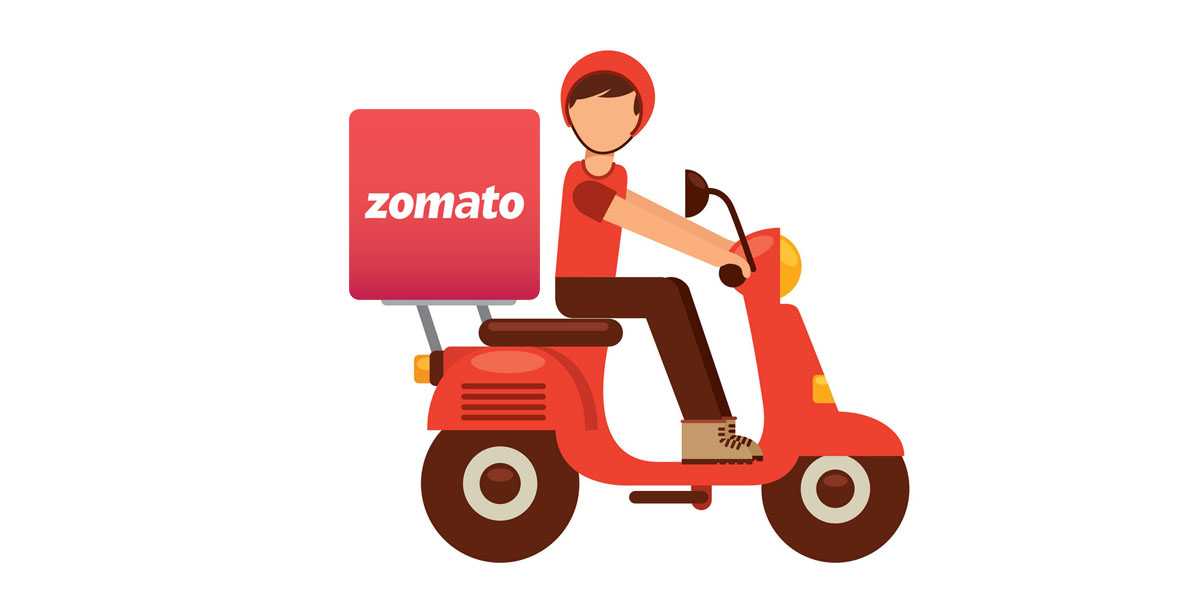

# Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. Zomato also began grocery delivery amid the COVID-19 outbreak. As of 2019, the service is available in 24 countries and in more than 10,000 cities.

## If you like, Please upvote

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv") # import dataset

In [ ]:
data.head(3) # first 3 row of dataset

In [ ]:
data.shape # shape of data

In [ ]:
data.info() # some import info of data

In [ ]:
# rename columns
data = data.rename(columns={"approx_cost(for two people)": "AvarageCost", "listed_in(type)": "listed_in_type", "listed_in(city)":"listed_in_city"})

In [ ]:
data.head(1)

# Exploratory Data Analysis -- EDA

In [ ]:
# drop some unnecessary columns
drop_list = ["address", "phone", "url", "location"]
data.drop(drop_list, axis=1, inplace=True)

In [ ]:
# Replace New by NaN
data["rate"] = data["rate"].replace("NEW", np.nan)
data.dropna(how="any", inplace=True)

In [ ]:
# rate column string to integer convert
X = data
X["rate"] = X["rate"].astype(str)
X["rate"] = X["rate"].apply(lambda x: x.replace('/5',''))
X["rate"] = X["rate"].apply(lambda x: float(x))

In [ ]:
X

In [ ]:
rcParams["figure.figsize"] = 14, 8
loc = X["listed_in_city"].value_counts()
sns.set(style="whitegrid")
sns.barplot(y=loc, x=loc.index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Different Location and Restaurent Count", fontweight="bold")

In [ ]:
# Count of total online ad ofline order
sns.countplot(X["online_order"])

In [ ]:
# Count of table booking 
sns.countplot(X["book_table"])

In [ ]:
rcParams["figure.figsize"] = 14, 8

# Differnt Restaurent Type
res_type = X["rest_type"].value_counts()
sns.set(style="whitegrid")
sns.barplot(y=res_type, x=res_type.index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Restaurent Type")

In [ ]:
# Avarage cost replace comma
X["AvarageCost"] = X["AvarageCost"].apply(lambda x:x.replace(",",""))
X["AvarageCost"] = X["AvarageCost"].astype("int")

In [ ]:
sns.distplot(X["AvarageCost"])
plt.title("Cost distribution for all restaurent")

In [ ]:
X = X.drop_duplicates(subset="name", keep="first") # drop duplicates restaurent names

# Rating Vs Online Order(Yes / No)

In [ ]:
highRatYes = X[(X["rate"] >= 4.5) & (X["online_order"] == "Yes")]
ratOnline = highRatYes.shape[0]
b = highRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating above 4.5")

highRatNo = X[(X["rate"] >= 4.5) & (X["online_order"] == "No")]
ratOffline = highRatNo.shape[0]
b = highRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOffline} restaurents take offline order and their rating above 4.5")

print("*" * 50)

midRatYes = X[(X["rate"] >= 4.0) & (X["rate"] <= 4.4) & (X["online_order"] == "Yes")]
ratOnline = midRatYes.shape[0]
b = midRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating between 4.0 to 4.4")

midRatNo = X[(X["rate"] >= 4.0) & (X["rate"] <= 4.4) & (X["online_order"] == "No")]
ratOffline = midRatNo.shape[0]
b = midRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOffline} restaurents take offline order and their rating between 4.0 to 4.4")

print("*" * 50)

lowRatYes = X[(X["rate"] < 4.0) & (X["online_order"] == "Yes")]
ratOnline = lowRatYes.shape[0]
b = lowRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating less 4.0")

lowRatNo = X[(X["rate"] < 4.0) & (X["online_order"] == "No")]
ratOfline = lowRatNo.shape[0]
b = lowRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of High Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOfline} restaurents take offline order and their rating less 4.0")

# Location, Avarage Cost And Types Of Restaurents

In [ ]:
list_loc = ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield']
i = 0
for i in range(len(list_loc)):
    c = X[X["listed_in_city"]==list_loc[i]]
    i+=1
    d = c.max()
    e = d["listed_in_city"]
    f = d["AvarageCost"]
    a = c["listed_in_type"].value_counts()
    g = c.min()
    h = g["AvarageCost"]
    print(f"Location: {e} ----> Avarage Cost between:{h} to {f}\ntypes of restaurent at {e}\n{a}")

In [ ]:
# low budget restaurent
low_budget = X.groupby(['name','rest_type','cuisines', 'listed_in_city', 'rate', 'reviews_list', 'dish_liked'])['AvarageCost'].sum().sort_values(ascending=True).reset_index()
low_budget = low_budget[low_budget["AvarageCost"] <= 1500]

# mid budget restaurent
mid_budget = X.groupby(['name','rest_type','cuisines', 'listed_in_city', 'rate', 'reviews_list', 'dish_liked'])['AvarageCost'].sum().sort_values(ascending=True).reset_index()
mid_budget = mid_budget[(mid_budget["AvarageCost"] > 1500) & (mid_budget["AvarageCost"] <= 3000)]

# High budget restaurent
high_budget = X.groupby(['name','rest_type','cuisines', 'listed_in_city', 'rate', 'reviews_list', 'dish_liked'])['AvarageCost'].sum().sort_values(ascending=True).reset_index()
high_budget = high_budget[(high_budget["AvarageCost"] > 3000) & (high_budget["AvarageCost"] <= 6000)]

In [ ]:
# Lowest Budget restaurent

low = low_budget["listed_in_city"].value_counts()
g = sns.barplot(y=low.values, x=low.index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Lowest budget restaurent from different area")
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.6, p.get_height()+1.3), ha='center', va='bottom', color= 'black', rotation=90)

In [ ]:
# Mid budget restaurent

mid = mid_budget["listed_in_city"].value_counts()
g = sns.barplot(y=mid.values, x=mid.index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Mid budget restaurent from different area")
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.3), ha='center', va='bottom', color= 'black', rotation=90)

In [ ]:
# High budget Restaurent


high = high_budget["listed_in_city"].value_counts()
g = sns.barplot(x=high.index, y=high.values, palette="plasma")
plt.xticks(rotation=90)
plt.title("HIghest budget restaurent from different area")
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()+0.1), ha='center', va='bottom', color= 'black', rotation=90)

In [ ]:
# Lowest Cost, High rated different restaurent

plt.subplots(figsize=(18,9))
lowbudVsHigrat = low_budget[low_budget["rate"] >= 4.5]
lowbudVsHigrat.iloc[42,0] ="Santa Spa Cusinies"
sns.barplot(lowbudVsHigrat["name"], lowbudVsHigrat["AvarageCost"], palette="Set2")
plt.xticks(rotation=90);
plt.title("Lowest budget restaurent name vs avarage cost")

In [ ]:
# Cusines and mid budgets
print(mid_budget["cuisines"].value_counts()[:10])

In [ ]:
# Low budgets and cuisines
print(low_budget["cuisines"].value_counts()[:10])

# Create Word Cloud

In [ ]:
def cloud_word(budget):
    text = " ".join(dish for dish in budget["cuisines"])
    wc = WordCloud(max_font_size=100,colormap="summer", height=300, width=400, random_state=42, background_color='#151515')
    wc.generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

In [ ]:
# Low Avarage cost and cuisines
cloud_word(low_budget)

In [ ]:
# medium Avarage cost and cuisines
cloud_word(mid_budget)

In [ ]:
# High Avarage cost and cuisines
cloud_word(high_budget)

# dishes people liked in the restaurant

In [ ]:
def dish_like(budget):    
    dish_liked = " ".join(f for f in budget["dish_liked"])
    wc_ = WordCloud(max_font_size=100,colormap="Set2", height=300, width=400, random_state=42, background_color='#151515')
    wc_.generate(dish_liked)
    plt.imshow(wc_, interpolation="bilinear")
    plt.axis("off")

In [ ]:
# Low avarage Cost and dishes people liked in the restaurant
dish_like(low_budget)

In [ ]:
# Medium avarage Cost and dishes people liked in the restaurant
dish_like(mid_budget)

In [ ]:
# High avarage Cost and dishes people liked in the restaurant

dish_like(high_budget)

In [ ]:
sns.heatmap(data.corr(), annot=True, linewidth=0.5, cmap="Blues_r") # heatmap

# I think there, People have Demand On North Indian Food

# If you want to start a new restaurent, You have remind that, Avarage Cost must be less, you should provide Online service, you must provide delivery.Try to gain reviews, that help you to grow rating. Give Discount on first order. Accept online or cash payment. Try Buy one get one policy. Special occasion, special discount or discount on big deal. Last of all, you always should, maintain your quality.

# If you like, please upvote